In [1]:
# python version 3.6.9 #
import pandas as pd # 1.1.5
import numpy as np # 1.19.5
import matplotlib.pyplot as plt
import matplotlib # 3.3.4
import scipy.stats as st # scipy 1.5.4

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
plt.rc('text', usetex=False)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 16})
plt.style.use('source_data/included/figure.style')
cm = plt.cm.get_cmap('tab20c')


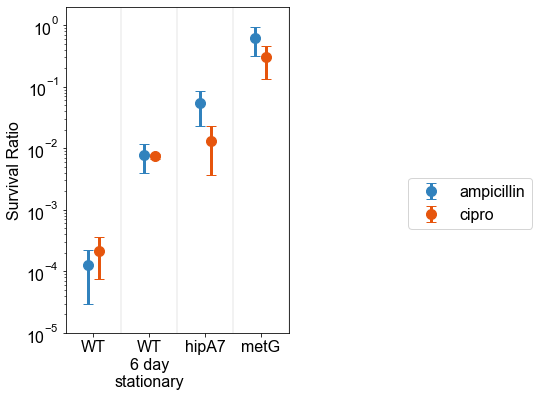

In [2]:
# figure 2B plot survival #
table = pd.read_csv('source_data/included/source_1B_ED1_2A.csv',sep=',')
table = table.loc[table['phase']=='lag']
table = table.loc[table['time_from_OD0.1']>20]

cm = plt.cm.get_cmap('tab20c')
np.random.seed(seed=1)
shift = 0.05
strain_list = ['MG1655','MG1655_6day','hipA7','metG']
names = ['WT','WT\n6 day\nstationary','hipA7','metG']
fig,ax = plt.subplots(figsize=(4,6))
i = 1

x = np.arange(1,5,1)
y = table.groupby(['strain'])['amp'].mean()[strain_list]
err = table.groupby(['strain'])['amp'].std()[strain_list]
ax.errorbar(x-0.1,y,yerr=err,fmt=".",markersize=20,capsize=5,color=cm(0),label='ampicillin')

x = np.arange(1,5,1)
y = table.groupby(['strain'])['cipro'].mean()[strain_list]
err = table.groupby(['strain'])['cipro'].std()[strain_list]
ax.errorbar(x+0.1,y,yerr=err,fmt=".",markersize=20,capsize=5,color=cm(4),label='cipro')
ax.set_yscale('log')

ax.set_ylim(10**(-5),10**0.3)
ax.set_xlim(0.5,4.5)
ax.set_xticks([1,2,3,4])
for i in [1.5,2.5,3.5,4.5,5.5]:
    ax.axvline(i,color='k',linewidth=0.2,alpha=0.5)
ax.set_xticklabels(names)
ax.legend(bbox_to_anchor=(1.5, 0.5),fontsize=16)
ax.set_ylabel('Survival Ratio')

plt.savefig('figures/fig2b.pdf')


In [3]:
# get p-values for figure 2A #

strain1 = 'MG1655'
strain2 = 'MG1655_6day'
x = table.loc[(table['strain']==strain1),'amp'].dropna()
y = table.loc[(table['strain']==strain2),'amp'].dropna()
print(st.mannwhitneyu(x,y)[1])

strain1 = 'MG1655'
strain2 = 'MG1655_6day'
x = table.loc[(table['strain']==strain1),'cipro'].dropna()
y = table.loc[(table['strain']==strain2),'cipro'].dropna()
print(st.mannwhitneyu(x,y)[1])

strain1 = 'MG1655'
strain2 = 'hipA7'
x = table.loc[(table['strain']==strain1),'amp'].dropna()
y = table.loc[(table['strain']==strain2),'amp'].dropna()
print(st.mannwhitneyu(x,y)[1])

strain1 = 'MG1655'
strain2 = 'hipA7'
x = table.loc[(table['strain']==strain1),'cipro'].dropna()
y = table.loc[(table['strain']==strain2),'cipro'].dropna()
print(st.mannwhitneyu(x,y)[1])

0.0048782602435154645
0.01597381971984455
0.001747528523787258
0.0017390891412775358


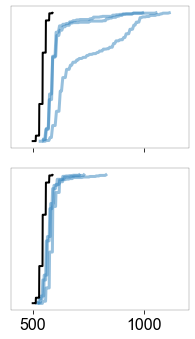

In [4]:
# fig 2c appearance times #

appearance_times = pd.read_csv('source_data/included/appearance_times_all.txt',sep='\t',index_col=0)

matplotlib.rcParams['axes.linewidth'] = 0.2 
colors = [cm(0),cm(0),cm(0),'k']
xmin = 400
xmax = 1200
alpha=0.5
fig, ax = plt.subplots(2,1, sharex='col',figsize=(3,5))
i=0
for t in ['hipA7_1_20211205','hipA7_2_20211205','hipA7_3_20211205']:
    data = appearance_times.loc[t,'appearance']
    count, bins_count = np.histogram(data, bins=100)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    if i == 0:
        ax[0].plot(bins_count[1:], cdf,linewidth=3,color=colors[i],label='hipA7 (n=3)',alpha=alpha)
    else:
        ax[0].plot(bins_count[1:], cdf,linewidth=3,color=colors[i],alpha=alpha)
    ax[0].set_yticks([])
    ax[0].set_xlim([xmin,xmax])
    i += 1

i=0
for t in ['WT_6day-1_20220421','WT_6day-2_20220421','WT_6day-3_20220421']:
    data = appearance_times.loc[t,'appearance']
    count, bins_count = np.histogram(data, bins=100)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    if i == 0:
        ax[1].plot(bins_count[1:], cdf,linewidth=3,color=colors[i],label='6-day stat (n=3)',alpha=alpha)
    else:
        ax[1].plot(bins_count[1:], cdf,linewidth=3,color=colors[i],alpha=alpha)
    ax[1].set_yticks([])
    ax[1].set_xlim([xmin,xmax])
    i += 1
    
for i in range(0,2):
    data = appearance_times.loc['WT_1day_20220421','appearance']
    count, bins_count = np.histogram(data, bins=100)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    ax[i].plot(bins_count[1:], cdf,linewidth=2,alpha=1,color='k',label='wt control')

plt.tight_layout()
plt.savefig('figures/fig2c_left.pdf')

matplotlib.rcParams['axes.linewidth'] = 1

MannwhitneyuResult(statistic=0.0, pvalue=0.006365682134961749)
MannwhitneyuResult(statistic=0.0, pvalue=0.006365682134961749)
MannwhitneyuResult(statistic=0.0, pvalue=0.005789657276670694)
MannwhitneyuResult(statistic=0.0, pvalue=0.005789657276670694)


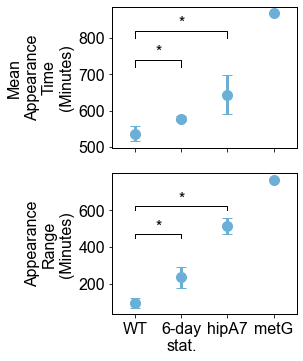

In [5]:
# fig2B statistics

## define sample groups for statistics ##
samples = {}
samples['hipA7'] = ['hipA7_1_20211205', 'hipA7_2_20211205', 'hipA7_3_20211205']
samples['WT_6d'] = ['WT_6day-1_20220421','WT_6day-2_20220421','WT_6day-3_20220421']
samples['WT'] = ['35-1_20230323','35-2_20230323','35-3_20230323','35-4_20230323','WT_1day_20220421','noTet1_20211115', 'noTet2_20211115', 'noTet3_20211115','wt_20221104','wt_20220829','MG1655_20220922']
samples['metG*'] = ['metG_20211205']

## define function to get mean of appearance times ##
def f(rep):
    return(appearance_times.loc[rep,'appearance'].mean())
## make dictionary of mean appearance times ##
s_func = {}
for s in samples.keys():
    s_func[s] = []
    for rep in samples[s]:
        s_func[s].append(f(rep))
to_plot = ['WT','WT_6d','hipA7','metG*']

## test significant differences in mean appearance times ##
print(st.mannwhitneyu(s_func['hipA7'],s_func['WT']))
print(st.mannwhitneyu(s_func['WT_6d'],s_func['WT']))

## plot means ##
fig,(ax,ax2) = plt.subplots(2,1,figsize=(4.5,5.3),sharex=True)
x = np.arange(0,len(to_plot))
means = [np.mean(s_func[x]) for x in to_plot]
stdevs = [np.std(s_func[x]) for x in to_plot]
for x_val,mean,stdev in zip(x,means,stdevs):
    ax.errorbar(x_val,mean,yerr=stdev,fmt=".",markersize=20,capsize=5,color=cm(1))
ax.set_ylabel('Mean\nAppearance\nTime\n(Minutes)')

## define function to get range of appearance times ##
def f(rep):
    return(appearance_times.loc[rep,'appearance'].max()-appearance_times.loc[rep,'appearance'].min())
## make dictionary of range of appearance times ##
s_func = {}
for s in samples.keys():
    s_func[s] = []
    for rep in samples[s]:
        s_func[s].append(f(rep))

## test significant differences in range of appearance times ##
print(st.mannwhitneyu(s_func['hipA7'],s_func['WT']))
print(st.mannwhitneyu(s_func['WT_6d'],s_func['WT']))

## plot ranges ##
means = [np.mean(s_func[x]) for x in to_plot]
stdevs = [np.std(s_func[x]) for x in to_plot]
for x_val,mean,stdev in zip(x,means,stdevs):
    ax2.errorbar(x_val,mean,yerr=stdev,fmt=".",markersize=20,capsize=5,color=cm(1))
ax2.set_xlim(-0.5,3.5)
ax2.set_ylabel('Appearance\nRange\n(Minutes)')
ax2.set_xticks([0,1,2,3])
names = ['WT','6-day\nstat.','hipA7','metG']
ax2.set_xticklabels(names)

## add significance to plot ##
x1 = 0
x2 = 1
y = 450
h = 20
ax2.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax2.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color='k',size=16)

x1 = 0
x2 = 2
y = 600
h = 20
ax2.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax2.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color='k',size=16)

x1 = 0
x2 = 1
y = 720
h = 20
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color='k',size=16)

x1 = 0
x2 = 2
y = 800
h = 20
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color='k',size=16)

plt.tight_layout()

plt.savefig('figures/fig2c_right.pdf')
